### Comparison of C++ and Python streering scripts' time output (FCCAnalysis was run using Random Access Memory)

In [2]:
import matplotlib.pyplot as plt
from tools.utilities  import json2dict, json2dict_cpp, plot_graph, divide_by_threads

In [3]:
data_ZH_100_ram_p = json2dict("/home/ihor/PycharmProjects/fccperf/jsonfiles/perf_ZH_100.json", [1, 65, 1])
data_ZH_100_ram_c = json2dict_cpp("/home/ihor/PycharmProjects/fccperf/jsonfiles/perf_cpp_ZH_100_ram.json", [1, 65, 1])
data_ZH_100_ram_c_wo_cache = json2dict_cpp("/home/ihor/PycharmProjects/fccperf/jsonfiles/perf_cpp_ZH_100_ram.json", [1, 65, 1])


In [4]:
real_time_p =  data_ZH_100_ram_p["real_time"]
real_time_c =  data_ZH_100_ram_c["real_time"]
real_time_c_wo_cache =  data_ZH_100_ram_c_wo_cache["real_time"]
n_threads = [i for i in range(1, 65, 1)]

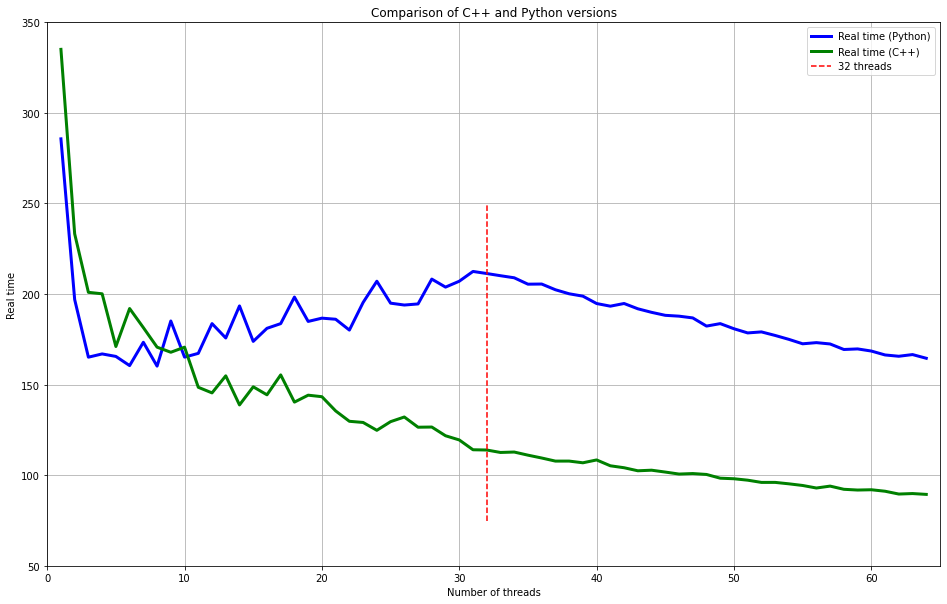

In [5]:
plt.figure(figsize=(16, 10), facecolor='white')
ax = plt.axes()
ax.set_facecolor('white')
ax.set_alpha(0.1)
plt.plot(n_threads, real_time_p, color='b', label='Real time (Python)', linewidth=3)
plt.plot(n_threads, real_time_c, color='g', label='Real time (C++)', linewidth=3)
# plt.plot(n_threads, real_time_c_wo_cache, color='y', label='Real time (C++) cache realise', linewidth=3)
plt.vlines(x = 32, ymin = 75, ymax = 250, color = 'r', label = '32 threads', linestyles="dashed")
plt.xlabel("Number of threads")
plt.ylabel("Real time")
plt.title("Comparison of C++ and Python versions")
plt.legend()
plt.xlim((0, 65))
plt.ylim((50, 350))
plt.grid()
plt.show()

In [9]:
def compute_nevents(total: int, datatime: list) -> list:
    result = list()
    for time in datatime:
        result.append(total/time)
    return result

In [11]:
total_events = 10000000
nevents_p =  compute_nevents(total_events, data_ZH_100_ram_p["real_time"])
nevents_c =  compute_nevents(total_events, data_ZH_100_ram_c["real_time"])
nevents_c_wo_cache =  compute_nevents(total_events, data_ZH_100_ram_c_wo_cache["real_time"])
nevents_p_bench = data_ZH_100_ram_p["n_events"]

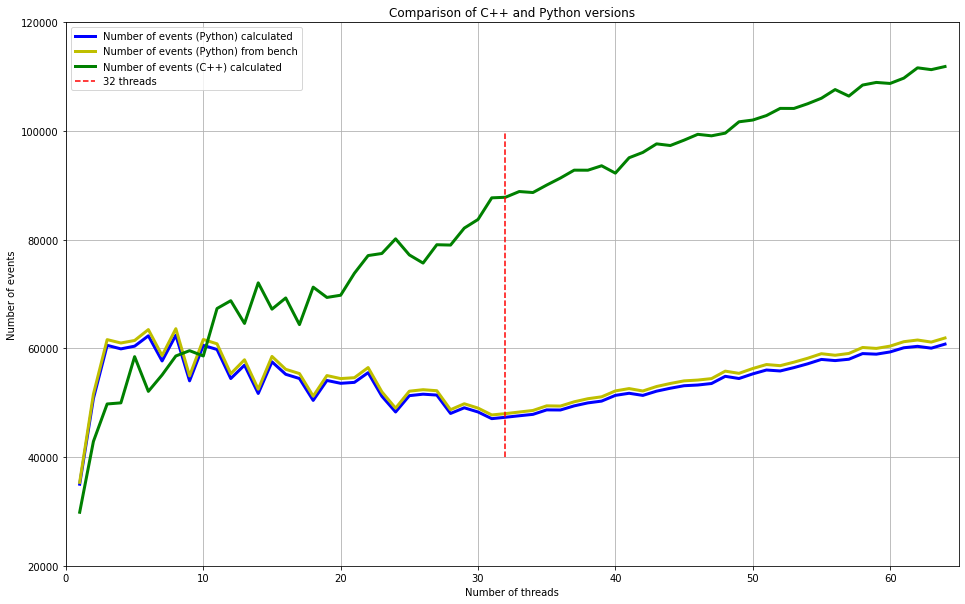

In [14]:
plt.figure(figsize=(16, 10), facecolor='white')
ax = plt.axes()
ax.set_facecolor('white')
ax.set_alpha(0.1)
plt.plot(n_threads, nevents_p, color = 'b', label = 'Number of events (Python) calculated', linewidth = 3)
plt.plot(n_threads, nevents_p_bench, color = 'y', label = 'Number of events (Python) from bench', linewidth = 3)
plt.plot(n_threads, nevents_c, color = 'g', label = 'Number of events (C++) calculated', linewidth = 3)
# plt.plot(n_threads, nevents_c_wo_cache, color = 'pink', label = 'Number of events (C++) calculated wo cache', linewidth = 3)
plt.vlines(x = 32, ymin = 40_000, ymax = 100_000, color = 'r', label = '32 threads', linestyles = "dashed")
plt.xlabel("Number of threads")
plt.ylabel("Number of events")
plt.title("Comparison of C++ and Python versions")
plt.legend()
plt.xlim((0, 65))
plt.ylim((20_000, 120_000))
plt.grid()
plt.show()